# `nu18` and `n24` totals compared to ACS

This compares totals of `nu18` and `n24` (children eligible for the Child Tax Credit) to [ACS totals of under-18 population over time](https://census.missouri.edu/acs/trends/report.php?p=29|27|24|21|18|14|11|8|5|3|1&g=01000US&s=Demographic).

*Data: CPS  |  Tax years: 2014-2018  |  Type: Static  |  Author: Max Ghenis  |  Date run: 2018-03-18*

## Setup

### Imports

In [1]:
import taxcalc as tc
import pandas as pd
import numpy as np
import copy
from bokeh.io import show, output_notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
# On Python 3.6 use "import urllib.request as url_lib".
import urllib as url_lib

In [2]:
tc.__version__

'0.17.0'

### Settings

In [3]:
sns.set_style('white')
DPI = 300
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.

In [4]:
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

# Use Seaborn's default color palette.
# https://stackoverflow.com/q/48958426/1840471 for reproducibility.
sns.set_palette(sns.color_palette())

In [5]:
# Show one decimal in tables.
pd.set_option('precision', 2)

## Generate data

In [6]:
recs = tc.Records.cps_constructor()
pol = tc.Policy()

In [7]:
def nu18_n24_total(year, metric):
    calc = tc.Calculator(records=recs, policy=tc.Policy(), verbose=False)
    calc.advance_to_year(year)
    calc.calc_all()
    df = calc.dataframe(['s006', metric])
    return (df.s006 * df[metric]).sum()

In [8]:
trend = pd.DataFrame({
    'nu18': [None, None, None, None, None, None, None, None,
             nu18_n24_total(2014, 'nu18'),
             nu18_n24_total(2015, 'nu18'),
             nu18_n24_total(2016, 'nu18'),
             nu18_n24_total(2017, 'nu18'),
             nu18_n24_total(2018, 'nu18'),
             nu18_n24_total(2019, 'nu18'),
             nu18_n24_total(2020, 'nu18'),
             nu18_n24_total(2021, 'nu18'),
             nu18_n24_total(2022, 'nu18'),
             nu18_n24_total(2023, 'nu18'),
             nu18_n24_total(2024, 'nu18'),
             nu18_n24_total(2025, 'nu18')],
    'n24': [None, None, None, None, None, None, None, None,
            nu18_n24_total(2014, 'n24'),
            nu18_n24_total(2015, 'n24'),
            nu18_n24_total(2016, 'n24'),
            nu18_n24_total(2017, 'n24'),
            nu18_n24_total(2018, 'n24'),
            nu18_n24_total(2019, 'n24'),
            nu18_n24_total(2020, 'n24'),
            nu18_n24_total(2021, 'n24'),
            nu18_n24_total(2022, 'n24'),
            nu18_n24_total(2023, 'n24'),
            nu18_n24_total(2024, 'n24'),
            nu18_n24_total(2025, 'n24')],
    'nu18_acs': [73765143, 73907975, 73921896, 74496983, 74165365, 73910701, 
                 73710410, 73586612, 73577423, 73629710, 73637743, 
                 None, None, None, None, None, None, None, None, None]
})
trend.index = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
               2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

In [9]:
trend_m = trend / 1e6
trend_m

,n24,nu18,nu18_acs
2006,NaN,NaN,73.77
2007,NaN,NaN,73.91
2008,NaN,NaN,73.92
2009,NaN,NaN,74.50
2010,NaN,NaN,74.17
2011,NaN,NaN,73.91
2012,NaN,NaN,73.71
2013,NaN,NaN,73.59
2014,81.65,78.79,73.58
2015,81.65,78.79,73.63


## Plot

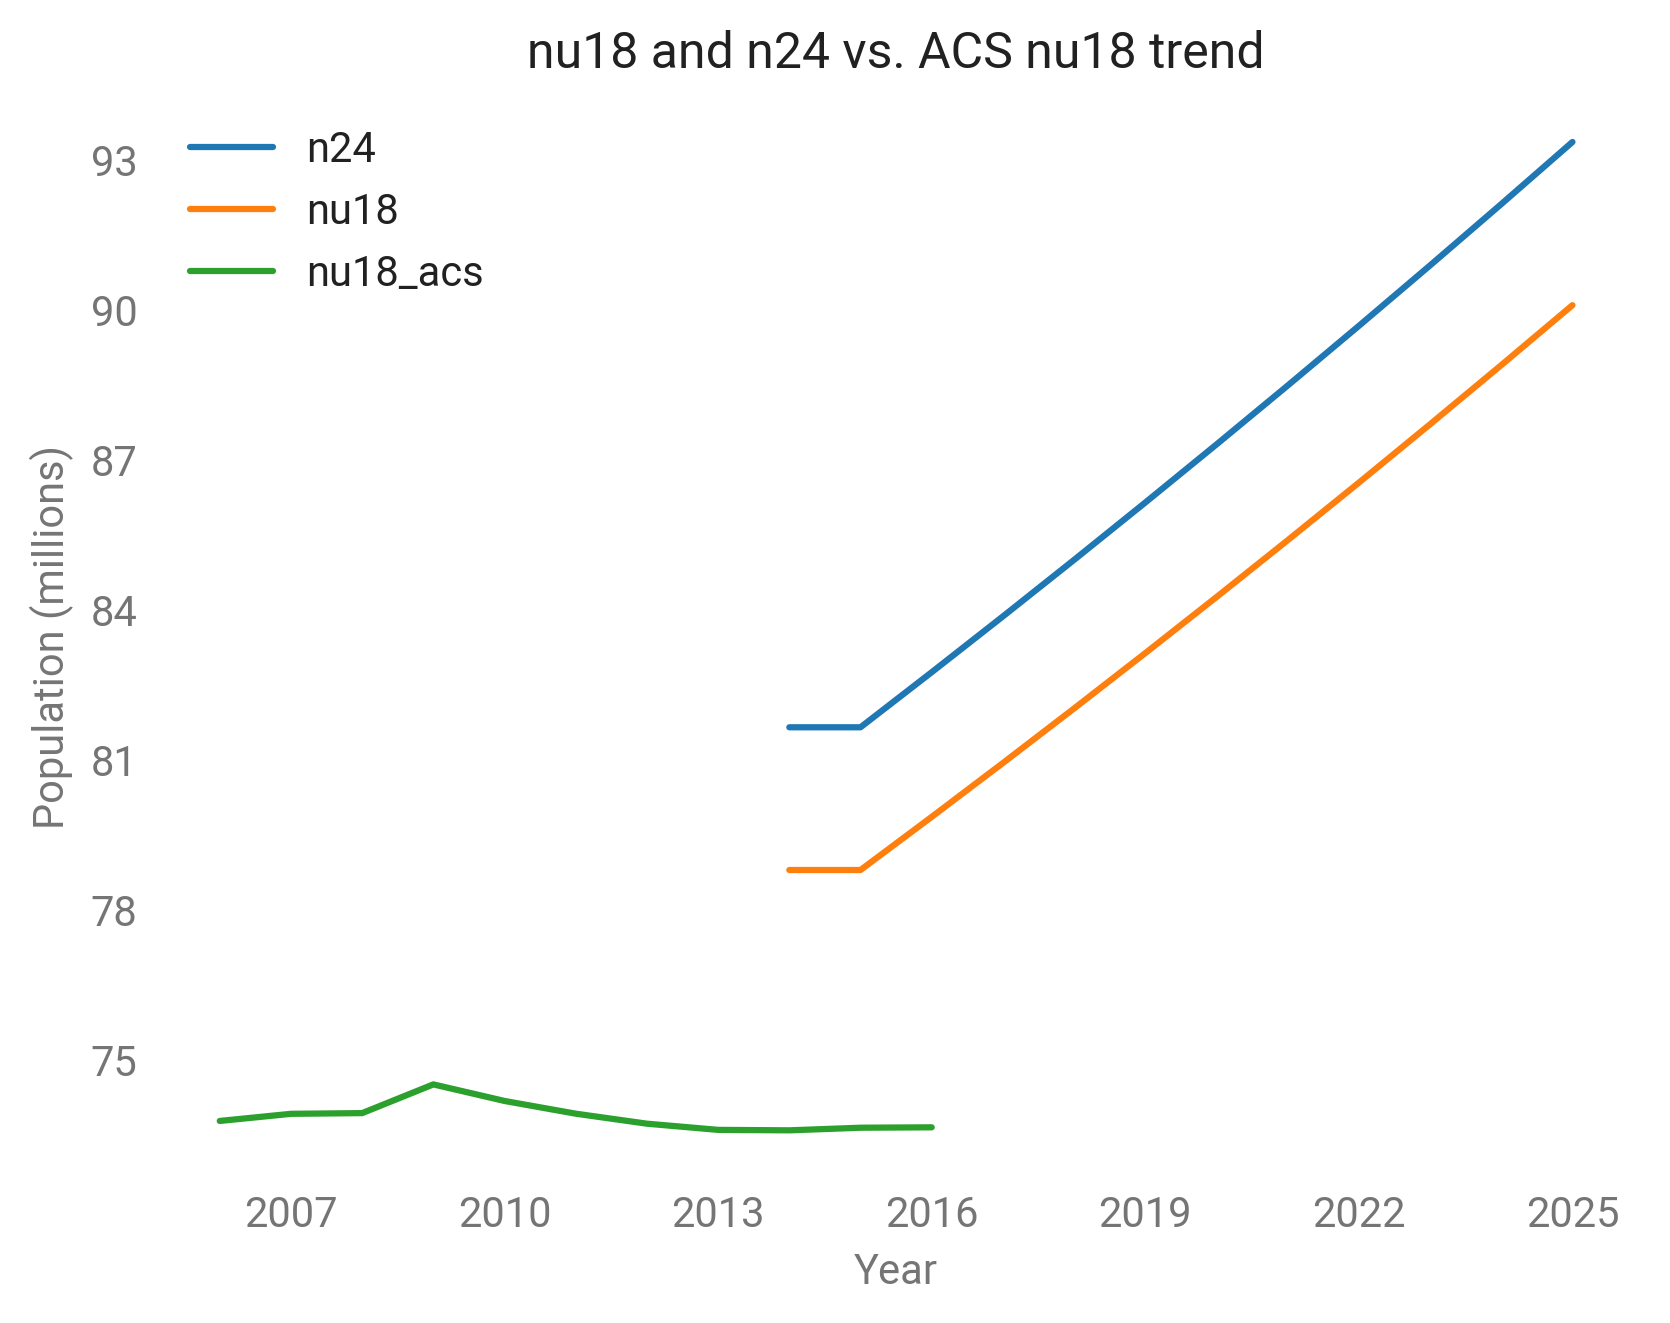

In [10]:
ax = trend_m.plot()
sns.despine(left=True, bottom=True)
plt.title('nu18 and n24 vs. ACS nu18 trend')
ax.set(xlabel='Year',
       ylabel='Population (millions)')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()